# Example Graph of Solutions

In [1]:
%load_ext autoreload
%autoreload 2

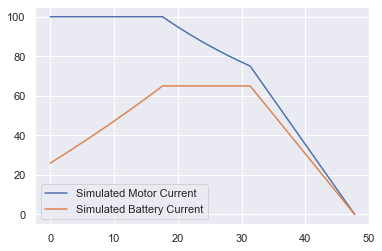

In [2]:
import ev_model as evc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# define symbolic variables
variables = evc.define_variables()

# define governing equations
equations = evc.define_equations_3p(*variables)

# create closed form solutions for motor and battery currents
solutions = evc.solve_equations(*equations, *variables)

# create local names for variables
Ib, Ic, Vb, Vc, Rm, k, omega, Rb, Voc, Imm, Ibm, torque = variables

# provide values for system we are predicting
ev_system = {Rb: 0.110, Voc:54.9, Imm: 100, Ibm:65, Rm: 0.09, k:1.15}

# numerically evaluate battery and motor currents
# generate_currents calls a function to find the frequency bounds for each regime
omega_values, Ib_values, Ic_values = evc.generate_currents(ev_system, *solutions, *variables)

# plot motor and battery currents
plt.plot(omega_values, Ic_values, label='Simulated Motor Current')
plt.plot(omega_values, Ib_values, label='Simulated Battery Current')    
plt.legend()

Text(0, 0.5, 'Phase Current (A)')

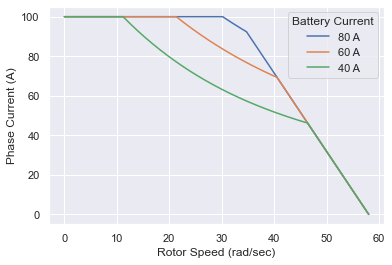

In [8]:
# Sweep a variable by calling `generate_currents` while changing an input

battery_currents = [80, 60, 40]
for bc in battery_currents:
    ev_system = {Rb: 0.141, Voc:58, Imm: 100, Ibm:bc, Rm: 0.075, k:1.0}
    omega_vals, Ib_vals, Ic_vals = evc.generate_currents(ev_system, *solutions, *variables)
    plt.plot(omega_vals, Ic_vals, label=f'{bc} A')
plt.legend(title='Battery Current')
plt.xlabel('Rotor Speed (rad/sec)')
plt.ylabel('Phase Current (A)')